## summary
- NLTK: for text processing
  - feature
    - comprehensive NLP library
    - text processing tool (tokenizae, stemming, lemmatize, parsing, syntactic tree)
  - application
    - linguistic analysis
    - tokenization
    - stemming
    - syntactic parsing
- SKlearn: for modeling
  - feature
    - tool for ML and pipeline (Pipeline, GridSearchCV)
    - basic text processing tool (CountVectorzer, TfidVectorizer)
  - application
    - text classification
    - clustering
    - task with integrated ML into text processing

In [35]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [36]:
# nltk.download()   # popup for selection

In [37]:
# nltk.download('omw-1.4')                   # Word senses, synonyms, translations (used in lemmatization with POS)
# nltk.download('punkt')                     # For tokenization
# nltk.download('wordnet')                   # For lemmatization
# nltk.download('stopwords')                 # For stopword removal
# nltk.download('averaged_perceptron_tagger')# For POS tagging
# nltk.download('gutenberg')

In [38]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File 'bbc_text_cls.csv' already there; not retrieving.



In [39]:
!ls

00_sklearn_example.ipynb
01_Stem_and_Lemmatize.ipynb
02_countvect.ipynb
03_TFIDF_recommender.ipynb
05_WordEmbedding.ipynb
GoogleNews-vectors-negative300.bin
GoogleNews-vectors-negative300.bin.gz
bbc_text_cls.csv
tmdb_5000_movies.csv
tmdb_5000_movies.csv.1
txt_nlp.ipynb


In [40]:
df = pd.read_csv('bbc_text_cls.csv')

### data exploration

In [41]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [42]:
len(df)

2225

In [43]:
inputs = df['text']
labels = df['labels']

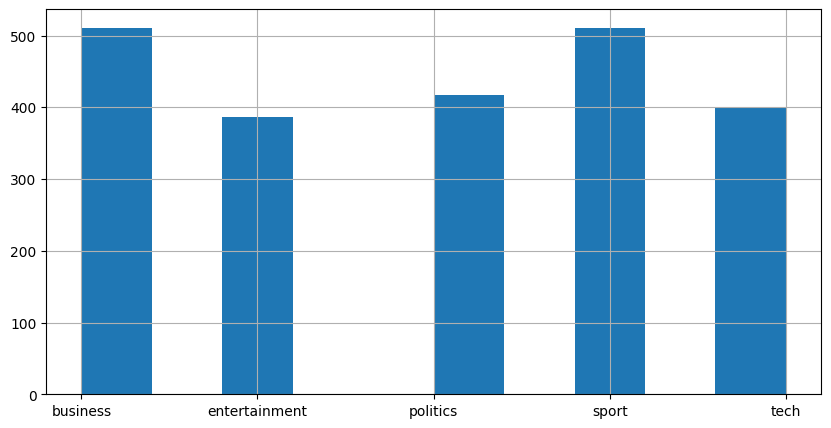

In [44]:
labels.hist(figsize=(10, 5));

### Modeling w/o STOP WORD

In [45]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
    inputs, labels, random_state=123)

In [46]:
vectorizer = CountVectorizer()

In [47]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

matrix
- spicy sparse matrix
- dense matrix (normal numpy array)

## matrix

### **sparse matrix**

In [48]:
print(Xtrain)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 337411 stored elements and shape (1668, 26287)>
  Coords	Values
  (0, 25718)	3
  (0, 21493)	3
  (0, 12374)	1
  (0, 23988)	3
  (0, 5212)	1
  (0, 21184)	1
  (0, 11348)	2
  (0, 7951)	1
  (0, 22558)	1
  (0, 24876)	2
  (0, 23660)	37
  (0, 16720)	22
  (0, 16742)	1
  (0, 7766)	2
  (0, 9546)	1
  (0, 5674)	1
  (0, 4372)	4
  (0, 22926)	1
  (0, 22005)	1
  (0, 10798)	6
  (0, 7101)	3
  (0, 11106)	3
  (0, 7872)	1
  (0, 16588)	2
  (0, 3282)	2
  :	:
  (1667, 19170)	1
  (1667, 2264)	1
  (1667, 3035)	1
  (1667, 6338)	1
  (1667, 15643)	1
  (1667, 21196)	1
  (1667, 4036)	1
  (1667, 7300)	1
  (1667, 5939)	1
  (1667, 22654)	1
  (1667, 6710)	1
  (1667, 12566)	1
  (1667, 3071)	1
  (1667, 7942)	1
  (1667, 16419)	1
  (1667, 24351)	1
  (1667, 5026)	1
  (1667, 3352)	1
  (1667, 9941)	1
  (1667, 5583)	1
  (1667, 16385)	1
  (1667, 3884)	1
  (1667, 17331)	1
  (1667, 10661)	1
  (1667, 9618)	1


In [49]:
coo = Xtrain.tocoo()
# sort by data values
sorted_entries = sorted(zip(coo.row, coo.col, coo.data), key=lambda x: x[2], reverse=True)
print(sorted_entries[:10]) 

# (row_index, column_index, value)

[(1042, 23660, 205), (11, 23660, 190), (1639, 23660, 169), (417, 23660, 145), (593, 23660, 133), (328, 23660, 131), (1647, 23660, 112), (11, 23902, 106), (1138, 23660, 98), (1647, 23902, 93)]


In [50]:
# Vocabulary: word -> column index
vocab = vectorizer.vocabulary_

# To get index -> word, invert the dict
inv_vocab = {idx: word for word, idx in vocab.items()}

# Given a column index, e.g. 23660 (in your case)
col_index = 23902

# Get the word, if present:
word = inv_vocab.get(col_index, "UNKNOWN")
print(word)

to


In [51]:
print(type(Xtrain))

<class 'scipy.sparse._csr.csr_matrix'>


### **dense matrix**

In [52]:
# convert to dense matrix (for viewing only)
display(Xtrain.toarray().shape)
Xtrain.toarray()

(1668, 26287)

array([[0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### **dense matrix with selected %sparsity**

In [53]:
import numpy as np

# Define shape and sparsity
shape = (10, 10)
sparsity_percent = 5
num_elements = shape[0] * shape[1]
num_nonzero = int((sparsity_percent / 100) * num_elements)

# Initialize all zeros
dense_matrix = np.zeros(shape)

# Randomly choose indices to set non-zero values
nonzero_indices = np.random.choice(num_elements, num_nonzero, replace=False)

# Fill selected positions with random values
for index in nonzero_indices:
    row, col = divmod(index, shape[1])
    dense_matrix[row, col] = np.random.rand()

print(dense_matrix)


[[0.         0.         0.         0.         0.56063582 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.37238016
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.18793431 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.98973336 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.98755036]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.   

### **convert dense_matrix to sparse_matrix**

In [54]:
import numpy as np
from scipy.sparse import csr_matrix

# Convert to CSR format
sparse_matrix = csr_matrix(dense_matrix)

print(sparse_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (10, 10)>
  Coords	Values
  (0, 4)	0.5606358193812049
  (2, 5)	0.3723801639419534
  (3, 8)	0.18793430804233924
  (6, 3)	0.9897333645784311
  (7, 9)	0.9875503568322697


### **convert sparse_matrix to dense_matrix**

In [55]:
# Dense to Array
dense_matrix = sparse_matrix.todense()
print(dense_matrix)

[[0.         0.         0.         0.         0.56063582 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.37238016
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.18793431 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.98973336 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.98755036]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.   

**back to course**

In [56]:
(Xtrain != 0).sum()

337411

**% sparsity** is  % of non-zero
- definition
  - Sparsity = % of zero elements = 100 - density
  - Density = % of nonzero elements (what you calculated).
- example
  - If your result is small (e.g., 2%), the matrix is very sparse (98% zeros).
  - If the result is large (e.g., 90%), the matrix is dense.

In [57]:
# what percentage of values are non-zero?
# (Xtrain != 0).sum() / np.prod(Xtrain.shape)*100
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007695239935415004

In [58]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9922062350119905
test score: 0.9712746858168761


In [59]:
Xtrain_wo_stop_word = Xtrain.copy()

### Modeling with STOP WORD

In [26]:
# with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score: 0.9766606822262118


### Modeling with lemmatization

In [27]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [28]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [29]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

c:\Users\khala\anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9922062350119905
test score: 0.9676840215439856


### Modeling with stemming

In [30]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [31]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

c:\Users\khala\anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9892086330935251
test score: 0.9694793536804309


### Modeling with tokenizer

In [32]:
def simple_tokenizer(s):
  return s.split()

In [33]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

c:\Users\khala\anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9952038369304557
test score: 0.9712746858168761


In [25]:
# What is the vector dimensionality in each case?
# Compare them and consider why they are larger / smaller

In [60]:
# without stopwords
print(f'Xtrain.shape w/o stopword: {Xtrain_wo_stop_word.shape} ')

Xtrain.shape w/o stopword: (1668, 26287) 


In [34]:
# with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
print(f'Xtrain.shape with stopword: {Xtrain.shape} ')

# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
print(f'Xtrain.shape with lemmatization: {Xtrain.shape} ')

# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
print(f'Xtrain.shape with stemming: {Xtrain.shape} ')

# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
print(f'Xtrain.shape with simple tokenizer: {Xtrain.shape} ')

Xtrain.shape with stopword: (1668, 25995) 


c:\Users\khala\anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Xtrain.shape with lemmatization: (1668, 25894) 
Xtrain.shape with stemming: (1668, 22714) 
Xtrain.shape with simple tokenizer: (1668, 52144) 


- w/o stop word
  - train score: 0.9922062350119905
  - test score: 0.9712746858168761
- w stop word
  - train score: 0.9928057553956835
  - test score: 0.9766606822262118
- lemmatization
  - train score: 0.9922062350119905
  - test score: 0.9676840215439856
- stemming
  - train score: 0.9892086330935251
  - test score: 0.9694793536804309
- tokenizer
  - train score: 0.9952038369304557
  - test score: 0.9712746858168761